<a href="https://colab.research.google.com/github/anajikadam17/Google-Colab/blob/main/NLP%5CSentiment_Analysis_with_VADER_TextBlob.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Sentiment Analysis with VADER

Sentiment analysis refers to the use of natural language processing, text analysis, computational linguistics, and many more to identify and quantify the sentiment of some kind of text or audio.

There are two major techniques for sentiment analysis :-

• Supervised machine learning

• Unsupervised lexicon-based

Often, you may not have the convenience of a well-labeled training dataset. In those situations, you need to use unsupervised techniques for predicting the sentiment by using knowledgebases, ontologies, databases, and lexicons that have detailed information specially curated and prepared just for sentiment analysis.

Here we use unsupervised lexicon based approach based on Vader lexicon for sentiment analysis.

VADER Sentiment Analysis. VADER (Valence Aware Dictionary and sEntiment Reasoner) is a lexicon and rule-based sentiment analysis tool that is specifically attuned to sentiments expressed in social media, and works well on texts from other domains.

## VADER
VADER ( Valence Aware Dictionary for Sentiment Reasoning) is a model used for text sentiment analysis that is sensitive to both polarity (positive/negative) and intensity (strength) of emotion. It is available in the NLTK package and can be applied directly to unlabeled text data.

VADER sentimental analysis relies on a dictionary that maps lexical features to emotion intensities known as sentiment scores. The sentiment score of a text can be obtained by summing up the intensity of each word in the text.
For example- Words like ‘love’, ‘enjoy’, ‘happy’, ‘like’ all convey a positive sentiment. Also VADER is intelligent enough to understand the basic context of these words, such as “did not love” as a negative statement. It also understands the emphasis of capitalization and punctuation, such as “ENJOY”

In [9]:
# install vader if not already available
!pip install vaderSentiment

     |████████████████████████████████| 125 kB 15.4 MB/s 


In [ ]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyser = SentimentIntensityAnalyzer()

In [ ]:
def sentiment_analyzer_scores1(sentence):
    score = analyser.polarity_scores(sentence)
    print("{:-<40} {}".format(sentence, str(score)))

In [ ]:
sentiment_analyzer_scores1("The phone is super cool.")

The phone is super cool.---------------- {'neg': 0.0, 'neu': 0.326, 'pos': 0.674, 'compound': 0.7351}


We will be going to work on complete sentences, and for this we’re going to import a trained NLTK lexicon called VADER.

In [ ]:
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sid = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


/usr/local/lib/python3.7/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


VADER’s SentimentIntensityAnalyzer() takes in a string and returns a dictionary of scores in each of four categories:
- negative
- neutral
- positive
- compound (computed by normalizing the scores above)

In [ ]:
def sentiment_analyzer_scores(sentence):
    score = sid.polarity_scores(sentence)
    print("{:-<40} {}".format(sentence, str(score)))

In [ ]:
sentiment_analyzer_scores("The phone is super cool.")

The phone is super cool.---------------- {'neg': 0.0, 'neu': 0.326, 'pos': 0.674, 'compound': 0.7351}


## Punctuation
The use of an exclamation mark(!), increases the magnitude of the intensity without modifying the semantic orientation. For example, “The food here is good!” is more intense than “The food here is good.” and an increase in the number of (!), increases the magnitude accordingly.

In [ ]:
sentiment_analyzer_scores("The phone is super cool!")
sentiment_analyzer_scores("The phone is super cool!!")
sentiment_analyzer_scores("The phone is super cool!!!")

The phone is super cool!---------------- {'neg': 0.0, 'neu': 0.316, 'pos': 0.684, 'compound': 0.7574}
The phone is super cool!!--------------- {'neg': 0.0, 'neu': 0.307, 'pos': 0.693, 'compound': 0.7772}
The phone is super cool!!!-------------- {'neg': 0.0, 'neu': 0.298, 'pos': 0.702, 'compound': 0.795}


## Capitalization
Using upper case letters to emphasize a sentiment-relevant word in the presence of other non-capitalized words, increases the magnitude of the sentiment intensity. For example, “The food here is GREAT!” conveys more intensity than “The food here is great!”

In [ ]:

sentiment_analyzer_scores("The phone is super cool!")
sentiment_analyzer_scores("The phone is super COOL!")

The phone is super cool!---------------- {'neg': 0.0, 'neu': 0.316, 'pos': 0.684, 'compound': 0.7574}
The phone is super COOL!---------------- {'neg': 0.0, 'neu': 0.293, 'pos': 0.707, 'compound': 0.8034}


## Degree Modifiers
Also called intensifiers, they impact the sentiment intensity by either increasing or decreasing the intensity. For example, “The service here is extremely good” is more intense than “The service here is good”, whereas “The service here is marginally good” reduces the intensity.

In [ ]:
sentiment_analyzer_scores("Food here is good.")
sentiment_analyzer_scores("Food here is very good.")
sentiment_analyzer_scores("Food here is moderately good.")
sentiment_analyzer_scores("Food here is extremely good.")

Food here is good.---------------------- {'neg': 0.0, 'neu': 0.508, 'pos': 0.492, 'compound': 0.4404}
Food here is very good.----------------- {'neg': 0.0, 'neu': 0.556, 'pos': 0.444, 'compound': 0.4927}
Food here is moderately good.----------- {'neg': 0.0, 'neu': 0.58, 'pos': 0.42, 'compound': 0.4404}
Food here is extremely good.------------ {'neg': 0.0, 'neu': 0.556, 'pos': 0.444, 'compound': 0.4927}


## Conjunctions
Use of conjunctions like “but” signals a shift in sentiment polarity, with the sentiment of the text following the conjunction being dominant. “The food here is great, but the service is horrible” has mixed sentiment, with the latter half dictating the overall rating.

In [ ]:
sentiment_analyzer_scores("Food here is extremely good but service is horrible.")

Food here is extremely good but service is horrible. {'neg': 0.343, 'neu': 0.506, 'pos': 0.151, 'compound': -0.5652}


## Preceding Tri-gram
By examining the tri-gram preceding a sentiment-laden lexical feature, we catch nearly 90% of cases where negation flips the polarity of the text. A negated sentence would be “The food here isn’t really all that great”.

In [ ]:
sentiment_analyzer_scores("The food here isn’t really all that great")
sentiment_analyzer_scores("The food here isn’t that great")

sentiment_analyzer_scores("The food here is not really all that great")
sentiment_analyzer_scores("The food here is not that great")

The food here isn’t really all that great {'neg': 0.0, 'neu': 0.616, 'pos': 0.384, 'compound': 0.6557}
The food here isn’t that great---------- {'neg': 0.0, 'neu': 0.549, 'pos': 0.451, 'compound': 0.6249}
The food here is not really all that great {'neg': 0.0, 'neu': 0.647, 'pos': 0.353, 'compound': 0.6557}
The food here is not that great--------- {'neg': 0.354, 'neu': 0.646, 'pos': 0.0, 'compound': -0.5096}


## Handling Emojis, Slangs and Emoticons
VADER performs very well with emojis, slangs and acronyms in sentences.

Let us see each with an example.

In [ ]:
print(sentiment_analyzer_scores('I am 😄 today'))
print(sentiment_analyzer_scores('😊'))
print(sentiment_analyzer_scores('😥'))
print(sentiment_analyzer_scores('☹️'))

I am 😄 today---------------------------- {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
None
😊--------------------------------------- {'neg': 0.0, 'neu': 0.0, 'pos': 0.0, 'compound': 0.0}
None
😥--------------------------------------- {'neg': 0.0, 'neu': 0.0, 'pos': 0.0, 'compound': 0.0}
None
☹️-------------------------------------- {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
None


### Emojis can not handle by nltk vedar but it done by vaderSentiment

In [ ]:
print(sentiment_analyzer_scores1('I am 😄 today'))
print(sentiment_analyzer_scores1('😊'))
print(sentiment_analyzer_scores1('😥'))
print(sentiment_analyzer_scores1('☹️'))

I am 😄 today---------------------------- {'neg': 0.0, 'neu': 0.522, 'pos': 0.478, 'compound': 0.6705}
None
😊--------------------------------------- {'neg': 0.0, 'neu': 0.333, 'pos': 0.667, 'compound': 0.7184}
None
😥--------------------------------------- {'neg': 0.275, 'neu': 0.268, 'pos': 0.456, 'compound': 0.3291}
None
☹️-------------------------------------- {'neg': 0.706, 'neu': 0.294, 'pos': 0.0, 'compound': -0.34}
None


In [ ]:
# Slangs
print(sentiment_analyzer_scores("Today SUX!"))
print(sentiment_analyzer_scores("Today only kinda sux! But I'll get by, lol"))

Today SUX!------------------------------ {'neg': 0.779, 'neu': 0.221, 'pos': 0.0, 'compound': -0.5461}
None
Today only kinda sux! But I'll get by, lol {'neg': 0.179, 'neu': 0.569, 'pos': 0.251, 'compound': 0.2228}
None


In [ ]:
# Emoticons
print(sentiment_analyzer_scores("Make sure you :) or :D today!"))

Make sure you :) or :D today!----------- {'neg': 0.0, 'neu': 0.294, 'pos': 0.706, 'compound': 0.8633}
None


## Processing Multiple Sentences

In [ ]:
import pandas as pd

scores =[]
sentences = ["A really bad, horrible book.","A good, awesome, wonderful, cool book !!!  :)"]

for sentence in sentences:
    score = analyser.polarity_scores(sentence)
    scores.append(score)
    
#Converting List of Dictionaries into Dataframe
dataFrame= pd.DataFrame(scores)

print(dataFrame)

print("Overall Sentiment Score for the multiple sentences :-\n ",dataFrame.mean())

     neg    neu    pos  compound
0  0.716  0.284  0.000   -0.8211
1  0.000  0.151  0.849    0.9507
Overall Sentiment Score for the multiple sentences :-
  neg         0.3580
neu         0.2175
pos         0.4245
compound    0.0648
dtype: float64


# Sentiment Analysis: VADER or TextBlob

## Textblob:

[https://textblob.readthedocs.io/en/dev/](https://textblob.readthedocs.io/en/dev/)

“ TextBlob is a Python (2 and 3) library for processing textual data. It provides a simple API for diving into common natural language processing (NLP) tasks such as part-of-speech tagging, noun phrase extraction, sentiment analysis, classification, translation, and more”

Textblob sentiment analyzer returns two properties for a given input sentence:

- Polarity is a float that lies between [-1,1], -1 indicates negative sentiment and +1 indicates positive sentiments.
- Subjectivity is also a float that lies in the range of [0,1]. Subjective sentences generally refer to opinion, emotion, or judgment.

In [1]:
from textblob import TextBlob

In [2]:
test = TextBlob("The movie was awesome!")
print(test.sentiment)

Sentiment(polarity=1.0, subjectivity=1.0)


The subjectivity is TextBlobs score of whether the statement is deemed as more opinion, or fact based. A higher subjectivity score means it is less objective, and therefore would be highly opinionated.

In [4]:
test = TextBlob("The movie was bad")
print(test.sentiment)

Sentiment(polarity=-0.6999999999999998, subjectivity=0.6666666666666666)


In [5]:
test = TextBlob("The movie was good but ending bad")
print(test.sentiment)

Sentiment(polarity=5.551115123125783e-17, subjectivity=0.6333333333333333)


In [12]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.sentiment.util import *
from textblob import TextBlob
from nltk import tokenize
import pandas as pd
reviews_path = "/content/drive/MyDrive/Colab/NLP/Data/hotel-reviews.csv/hotel-reviews.csv"
df = pd.read_csv(reviews_path)
df.head()

,User_ID,Description,Browser_Used,Device_Used,Is_Response
0,id10326,The room was kind of clean but had a VERY stro...,Edge,Mobile,not happy
1,id10327,I stayed at the Crown Plaza April -- - April -...,Internet Explorer,Mobile,not happy
2,id10328,I booked this hotel through Hotwire at the low...,Mozilla,Tablet,not happy
3,id10329,Stayed here with husband and sons on the way t...,InternetExplorer,Desktop,happy
4,id10330,My girlfriends and I stayed here to celebrate ...,Edge,Tablet,not happy


In [13]:
df.drop_duplicates(subset ="Description", keep = "first", inplace = True)
df['Description'] = df['Description'].astype('str')

def get_polarity(text):
  return TextBlob(text).sentiment.polarity

df['Polarity'] = df['Description'].apply(get_polarity)

In [14]:
df['Sentiment_Type']=''
df.loc[df.Polarity>0,'Sentiment_Type']='POSITIVE'
df.loc[df.Polarity==0,'Sentiment_Type']='NEUTRAL'
df.loc[df.Polarity<0,'Sentiment_Type']='NEGATIVE'
df.head()

,User_ID,Description,Browser_Used,Device_Used,Is_Response,Polarity,Sentiment_Type
0,id10326,The room was kind of clean but had a VERY stro...,Edge,Mobile,not happy,0.346190,POSITIVE
1,id10327,I stayed at the Crown Plaza April -- - April -...,Internet Explorer,Mobile,not happy,0.042363,POSITIVE
2,id10328,I booked this hotel through Hotwire at the low...,Mozilla,Tablet,not happy,0.124969,POSITIVE
3,id10329,Stayed here with husband and sons on the way t...,InternetExplorer,Desktop,happy,0.718500,POSITIVE
4,id10330,My girlfriends and I stayed here to celebrate ...,Edge,Tablet,not happy,0.117192,POSITIVE


In [16]:
df['Sentiment_Type'].value_counts()

POSITIVE    36002
NEGATIVE     2849
NEUTRAL        81
Name: Sentiment_Type, dtype: int64

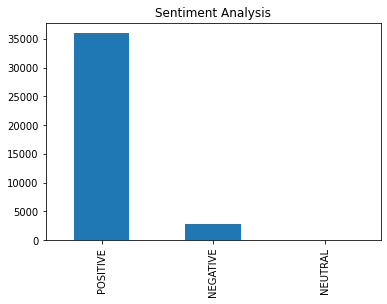

In [17]:
df.Sentiment_Type.value_counts().plot(kind='bar',title="Sentiment Analysis")

## VADER:

[https://github.com/cjhutto/vaderSentiment](https://github.com/cjhutto/vaderSentiment)

"VADER (Valence Aware Dictionary and sEntiment Reasoner) is a lexicon and rule-based sentiment analysis tool that is specifically attuned to sentiments expressed in social media."

It uses a list of lexical features (e.g. word) which are labeled as positive or negative according to their semantic orientation to calculate the text sentiment. Vader sentiment returns the probability of a given input sentence to be positive, negative, and neutral.

compound score — which is a “normalized, weighted, composite score” flags

In [10]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
sentence = "The movie was awesome!"
vs = analyzer.polarity_scores(sentence)
print("{:-<65} {}".format(sentence, str(vs)))

The movie was awesome!------------------------------------------- {'neg': 0.0, 'neu': 0.406, 'pos': 0.594, 'compound': 0.6588}


### VADER Sentiment Analysis

Vader is optimized for social media data and can yield good results when used with data from Twitter, Facebook, etc. As the above result shows the polarity of the word and their probabilities of being pos, neg neu, and compound.

In [6]:
reviews_path = "/content/drive/MyDrive/Colab/NLP/Data/hotel-reviews.csv/hotel-reviews.csv"

In [18]:
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [19]:
df['scores'] = df['Description'].apply(lambda Description: sid.polarity_scores(Description))
df.head()

,User_ID,Description,Browser_Used,Device_Used,Is_Response,Polarity,Sentiment_Type,scores
0,id10326,The room was kind of clean but had a VERY stro...,Edge,Mobile,not happy,0.346190,POSITIVE,"{'neg': 0.0, 'neu': 0.675, 'pos': 0.325, 'comp..."
1,id10327,I stayed at the Crown Plaza April -- - April -...,Internet Explorer,Mobile,not happy,0.042363,POSITIVE,"{'neg': 0.053, 'neu': 0.897, 'pos': 0.05, 'com..."
2,id10328,I booked this hotel through Hotwire at the low...,Mozilla,Tablet,not happy,0.124969,POSITIVE,"{'neg': 0.048, 'neu': 0.866, 'pos': 0.085, 'co..."
3,id10329,Stayed here with husband and sons on the way t...,InternetExplorer,Desktop,happy,0.718500,POSITIVE,"{'neg': 0.0, 'neu': 0.653, 'pos': 0.347, 'comp..."
4,id10330,My girlfriends and I stayed here to celebrate ...,Edge,Tablet,not happy,0.117192,POSITIVE,"{'neg': 0.041, 'neu': 0.871, 'pos': 0.088, 'co..."


In [20]:
df['compound'] = df['scores'].apply(lambda score_dict: score_dict['compound'])


In [21]:
df['sentiment_type']=''
df.loc[df.compound>0,'sentiment_type']='POSITIVE'
df.loc[df.compound==0,'sentiment_type']='NEUTRAL'
df.loc[df.compound<0,'sentiment_type']='NEGATIVE'
df.head()

,User_ID,Description,Browser_Used,Device_Used,Is_Response,Polarity,Sentiment_Type,scores,compound,sentiment_type
0,id10326,The room was kind of clean but had a VERY stro...,Edge,Mobile,not happy,0.346190,POSITIVE,"{'neg': 0.0, 'neu': 0.675, 'pos': 0.325, 'comp...",0.9628,POSITIVE
1,id10327,I stayed at the Crown Plaza April -- - April -...,Internet Explorer,Mobile,not happy,0.042363,POSITIVE,"{'neg': 0.053, 'neu': 0.897, 'pos': 0.05, 'com...",-0.1243,NEGATIVE
2,id10328,I booked this hotel through Hotwire at the low...,Mozilla,Tablet,not happy,0.124969,POSITIVE,"{'neg': 0.048, 'neu': 0.866, 'pos': 0.085, 'co...",0.9279,POSITIVE
3,id10329,Stayed here with husband and sons on the way t...,InternetExplorer,Desktop,happy,0.718500,POSITIVE,"{'neg': 0.0, 'neu': 0.653, 'pos': 0.347, 'comp...",0.9920,POSITIVE
4,id10330,My girlfriends and I stayed here to celebrate ...,Edge,Tablet,not happy,0.117192,POSITIVE,"{'neg': 0.041, 'neu': 0.871, 'pos': 0.088, 'co...",0.9088,POSITIVE


In [23]:
df['sentiment_type'].value_counts()

POSITIVE    34669
NEGATIVE     4189
NEUTRAL        74
Name: sentiment_type, dtype: int64

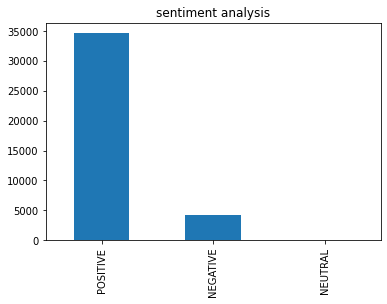

In [24]:
df.sentiment_type.value_counts().plot(kind='bar',title="sentiment analysis")

## Both libraries offer a host of features — it’s best to try to run some sample data on your subject matter to see which performs best for your requirements.
## From my tests, VADER seems to work better with things like slang, emojis, etc — whereas TextBlob performs strongly with more formal language usage.

Both libraries are also highly extendable to look at many other categories related to natural language processing, such as:

### Part of Speech Tagging
The process of converting a sentence to a list of tuples(word, tag). The tag in case of is a part-of-speech tag, and signifies whether the word is a noun, adjective, verb, etc.

### Tokenization
Breaking the sentence or block of text into individual ‘tokens’ for analysis.

### N-grams
Splitting the sentence into blocks of size n. In the below example, I used n=5, so it outputs all possible continuous blocks of 5 tokens.